In [12]:
import gdown

gdown.download(id="1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100%|██████████| 14.6k/14.6k [00:00<00:00, 20.3MB/s]


'multiclass.csv'

In [13]:
import pandas as pd

df = pd.read_csv('multiclass.csv')
display(df.head())

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [14]:
num_classes = df['class'].nunique()
print(f"The number of classes in the dataset is: {num_classes}")

The number of classes in the dataset is: 3


In [15]:
print("Null values in the dataset:")
print(df.isnull().sum())

Null values in the dataset:
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64


In [16]:
# Check for missing values
print("Missing values before removal:")
missing_values_before = df.isnull().sum()
print(missing_values_before)

# Remove rows with missing values
df_cleaned = df.dropna()

print("\nMissing values after removal:")
missing_values_after = df_cleaned.isnull().sum()
print(missing_values_after)

if missing_values_before.sum() == 0:
    print("\nThere were no missing values in the dataset.")

display(df_cleaned.head())

Missing values before removal:
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

Missing values after removal:
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

There were no missing values in the dataset.


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [17]:
print("Data types of each feature:")
print(df_cleaned.dtypes)

Data types of each feature:
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
class               int64
dtype: object


In [18]:
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print("Categorical columns found:")
    print(categorical_cols)
else:
    print("No categorical columns found in the dataset.")

No categorical columns found in the dataset.


In [19]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (all columns except the 'class' column, which is the target)
numerical_cols = df_cleaned.columns.drop('class')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df_scaled = df_cleaned.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

print("DataFrame after standardization:")
display(df_scaled.head())

DataFrame after standardization:


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


In [20]:
class_distribution = df_cleaned['class'].value_counts()
print("Class distribution:")
print(class_distribution)

Class distribution:
class
2    180
3    173
1     87
Name: count, dtype: int64


In [21]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape of original data:", X.shape)
print("Shape of resampled data:", X_resampled.shape)
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Shape of original data: (440, 7)
Shape of resampled data: (540, 7)

Class distribution after SMOTE:
class
2    180
1    180
3    180
Name: count, dtype: int64


In [22]:
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
class
2    180
1    180
3    180
Name: count, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (432, 7)
Shape of X_test: (108, 7)
Shape of y_train: (432,)
Shape of y_test: (108,)


## Feature Correlation Analysis

### Subtask:
Calculate and visualize the correlation matrix to understand the relationships between features.

**Reasoning**:
Calculate the correlation matrix using the `.corr()` method on the DataFrame. A heatmap visualization can help in interpreting the correlations.

Correlation Matrix:


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
Region,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212,-0.038396
Fresh,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,-0.390320
Milk,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,-0.113982
Grocery,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,-0.125400
Frozen,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,-0.102664
Detergents_Paper,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,-0.095824
Delicassen,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,-0.098238
class,-0.038396,-0.390320,-0.113982,-0.125400,-0.102664,-0.095824,-0.098238,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Features')

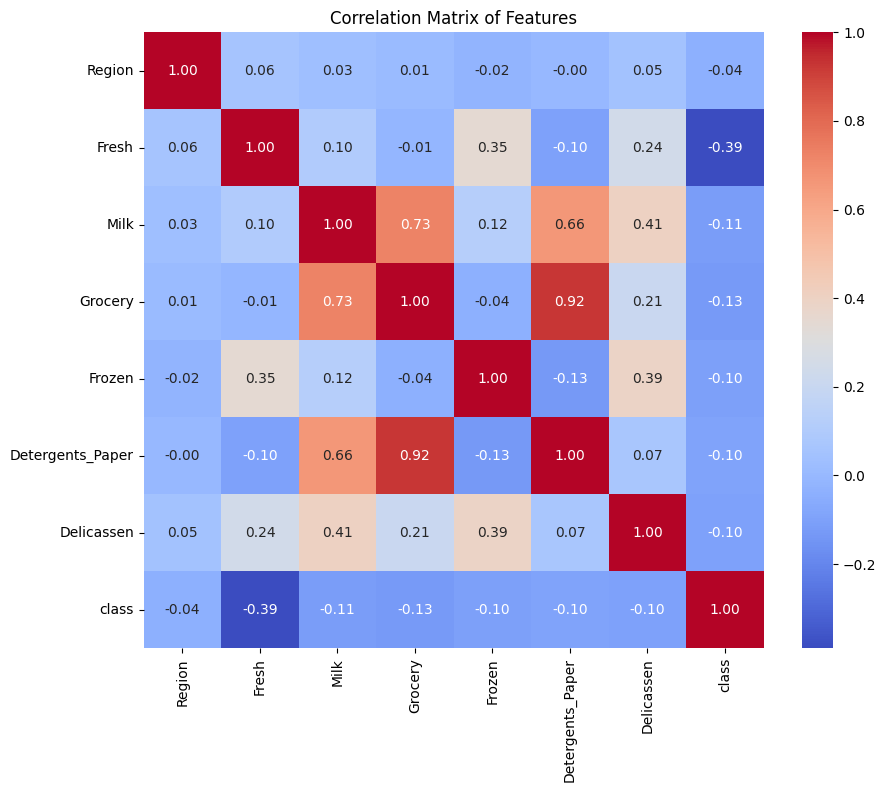

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')


In [25]:
# Find highly correlated features (absolute correlation > 0.5)
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add((colname_i, colname_j))

print("Highly correlated feature pairs (absolute correlation > 0.5):")
for feature_pair in highly_correlated_features:
    print(feature_pair)

Highly correlated feature pairs (absolute correlation > 0.5):
('Grocery', 'Milk')
('Detergents_Paper', 'Grocery')
('Detergents_Paper', 'Milk')


In [26]:
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA on the standardized data
pca = PCA()
pca.fit(df_scaled.drop('class', axis=1)) # Fit PCA on features excluding the target

# Display explained variance ratio by each component
print("Explained variance ratio by each principal component:")
display(pd.DataFrame({'Explained Variance Ratio': pca.explained_variance_ratio_}))

# Display cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
print("\nCumulative explained variance ratio:")
display(pd.DataFrame({'Cumulative Explained Variance Ratio': cumulative_explained_variance}))

Explained variance ratio by each principal component:


,Explained Variance Ratio
0,0.377953
1,0.243569
2,0.143756
3,0.105436
4,0.079494
5,0.040796
6,0.008996



Cumulative explained variance ratio:


,Cumulative Explained Variance Ratio
0,0.377953
1,0.621522
2,0.765277
3,0.870713
4,0.950208
5,0.991004
6,1.000000


In [27]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (432, 7)
Shape of X_test: (108, 7)
Shape of y_train: (432,)
Shape of y_test: (108,)


## K-Nearest Neighbors (KNN) Classification

### Subtask:
Train a KNN classification model and evaluate its performance.

**Reasoning**:
Import `KNeighborsClassifier` from `sklearn.neighbors`. Initialize the classifier, train it on the training data (`X_train`, `y_train`), and evaluate its performance on the testing data (`X_test`, `y_test`) using appropriate metrics like accuracy, precision, recall, and F1-score.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the KNN classifier
# You can choose the number of neighbors (n_neighbors). A common starting point is 5.
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8888888888888888

Confusion Matrix:
 [[34  0  2]
 [ 3 29  4]
 [ 3  0 33]]

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.94      0.89        36
           2       1.00      0.81      0.89        36
           3       0.85      0.92      0.88        36

    accuracy                           0.89       108
   macro avg       0.90      0.89      0.89       108
weighted avg       0.90      0.89      0.89       108



In [32]:
import numpy as np
from collections import Counter

def knn(X,Y,queryPoint,k):
  # Calculate Euclidean distance between the query point and all points in X
  dist = np.sqrt(np.sum((queryPoint - X)**2, axis=1))
  distances=[(dist[i],Y[i]) for i in range(len(dist))]
  distances= sorted(distances)
  distances=distances[:k]
  distances=np.array(distances)
  classes_counts=np.unqiue(distances)


